<a href="https://colab.research.google.com/github/F-Yousefi/GitLab/blob/main/Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning
-----------------
## **_Convolutional Neural Network_**
In the next cell, I want to learn more about Conv layers.

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10
from torchvision.transforms import v2
from torchvision import transforms

In [2]:
train_data = CIFAR10(
    root= "data",
    download= True,
    transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])
    )
test_data = CIFAR10(
    root= "data",
    train= False,
    download= True,
    transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])
    )

Files already downloaded and verified
Files already downloaded and verified


In [3]:
def print_iamges(samples, nrows, ncols,scale, titles = False):
    plt.rcParams.update({'font.size': 8})
    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols, figsize=(nrows * scale,ncols * scale))
    axes = axes.ravel()
    i = 0
    for idx,ax in enumerate(axes):
          ax.figure
          ax.imshow(samples[int(idx)], cmap="gray")
          if titles : ax.set_title(titles[int(idx/2)])



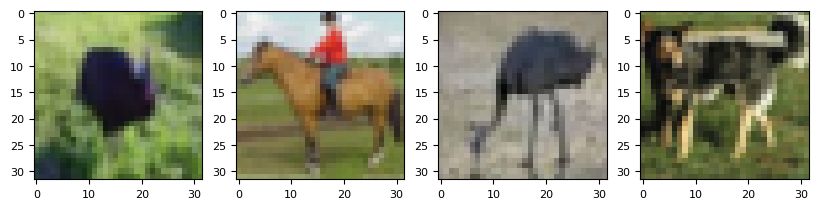

In [4]:
train_x, train_y = train_data.data, train_data.targets
samples = torch.randint(low= 0,high = 6000,size = (1,4)).tolist()[0]
len(train_x[samples])
print_iamges(train_x[samples], 1, 4,10)

In [5]:
kernel = torch.Tensor([[[[1, 1, 1], [0, 0, 0], [-1, -1, -1]]],[[[1, 0, -1], [1, 0, -1], [1, 0, -1]]]])
kernel.requires_grad = False


conv = nn.Conv2d(in_channels = 1, out_channels=2, kernel_size=3, stride=1, padding=1, bias=False)

with torch.no_grad():
    conv.weight = nn.Parameter(kernel)

x = v2.Compose([v2.ToTensor()])(torch.tensor(train_x[samples]).permute(0,3,1,2))
result = conv(x[:,0:1,:,:].float())

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


torch.Size([4, 2, 32, 32]) torch.Size([4, 3, 32, 32])


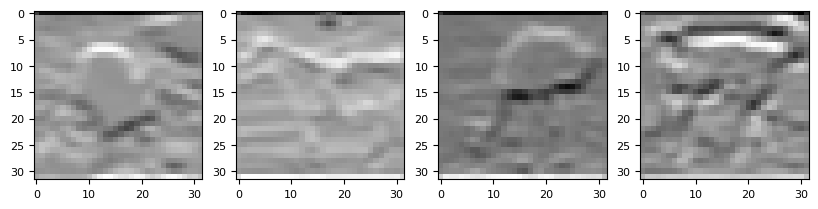

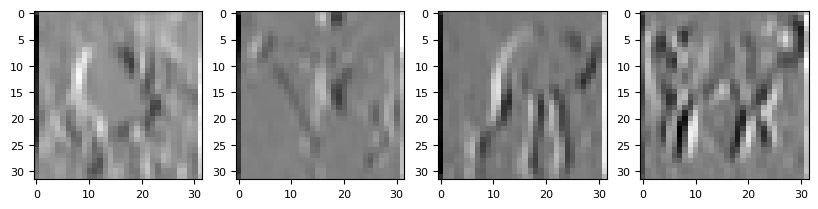

In [6]:
print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,0]),1,4,10)
print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,1]),1,4,10)
print(result.shape,x.shape)

In [7]:
kernel = torch.Tensor([[[[1, 1, 1], [0, 0, 0], [-1, -1, -1]]],[[[1, 0, -1], [1, 0, -1], [1, 0, -1]]]])
kernel.requires_grad = False


conv = nn.Conv2d(in_channels = 1, out_channels=2, kernel_size=3, stride=2, padding=1, bias=False)

with torch.no_grad():
    conv.weight = nn.Parameter(kernel)

x = v2.Compose([v2.ToTensor()])(torch.tensor(train_x[samples]).permute(0,3,1,2))
result = conv(x[:,0:1,:,:].float())

## Stride
The last step might not be taken.

(n,n) * (f,f): 
[(n+ 2 * padding -f)/stride]+1 = final size.

For example: torch.Size([32, 32]) with padding 1 and stride 2 :torch.Size([16, 16]) 


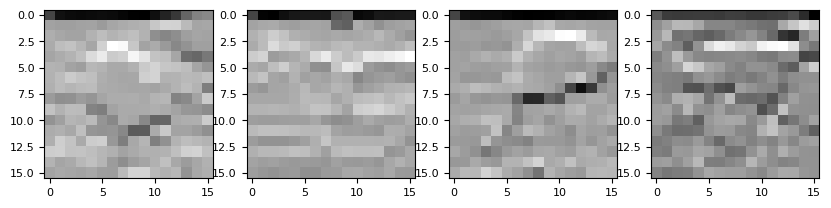

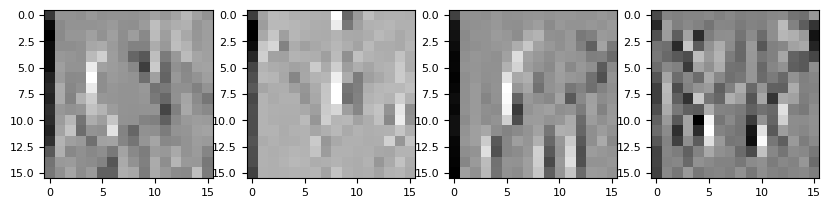

In [8]:
print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,0]),1,4,10)
print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,1]),1,4,10)
print(f"(n,n) * (f,f): \n[(n+ 2 * padding -f)/stride]+1 = final size.\n\nFor example: \
{x.shape[-2:]} with padding 1 and stride 2 :{result.shape[-2:]} ")

## Convolution over volums


In [9]:
kernel = torch.Tensor([[[[1, 1, 1], [0, 0, 0], [-1, -1, -1]],
                        [[1, 0, -1], [1, 0, -1], [1, 0, -1]],
                        [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]]])
kernel.requires_grad = False


conv = nn.Conv2d(in_channels = 3, out_channels=1, kernel_size=3, stride=1, padding=1, bias=False)

with torch.no_grad():
    conv.weight = nn.Parameter(kernel)

x = v2.Compose([v2.ToTensor()])(torch.tensor(train_x[samples]).permute(0,3,1,2))
result = conv(x.float())

(n,n) * (f,f): 
[(n+ 2 * padding -f)/stride]+1 = final size.

For example: torch.Size([32, 32]) with padding 1 and stride 2 :torch.Size([32, 32]) 


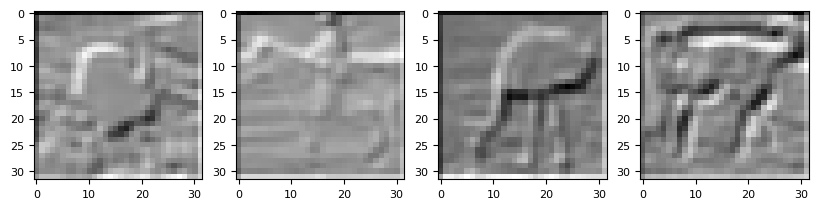

In [10]:
print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,:]),1,4,10)
# print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,1]),1,4,10)
print(f"(n,n) * (f,f): \n[(n+ 2 * padding -f)/stride]+1 = final size.\n\nFor example: \
{x.shape[-2:]} with padding 1 and stride 2 :{result.shape[-2:]} ")

For each out_channel, we have different biases. each rely is diffewrent

ReLU(out_channel[0]+ b0)

ReLU(out_channel[1]+ b1)

ReLU(out_channel[2]+ b2)

# Max pooling

In [11]:
pool1 = nn.MaxPool2d(kernel_size=2,stride=1, padding=0)(result)

(n,n) * (f,f): 
[(n+ 2 * padding -f)/stride]+1 = final size.

For example: torch.Size([32, 32]) with padding 1 and stride 2 :torch.Size([32, 32]) 


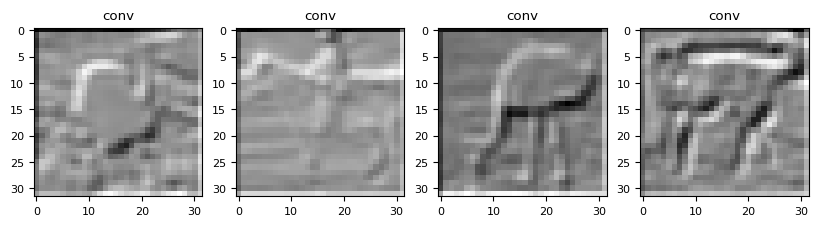

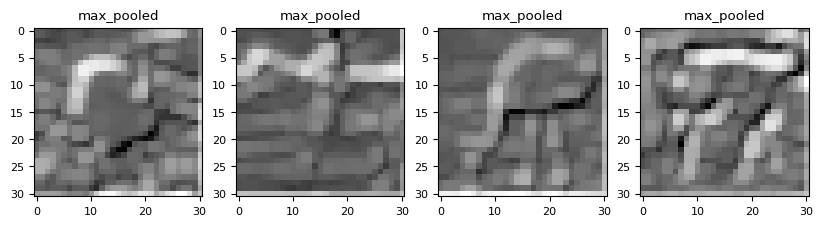

In [12]:
print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,:]),1,4,10,titles=["conv"]*4)
print_iamges(list(pool1.permute(0,2,3,1).detach().numpy()[:,:,:,:]),1,4,10,titles=["max_pooled"]*4)

# print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,1]),1,4,10)
print(f"(n,n) * (f,f): \n[(n+ 2 * padding -f)/stride]+1 = final size.\n\nFor example: \
{x.shape[-2:]} with padding 1 and stride 2 :{result.shape[-2:]} ")

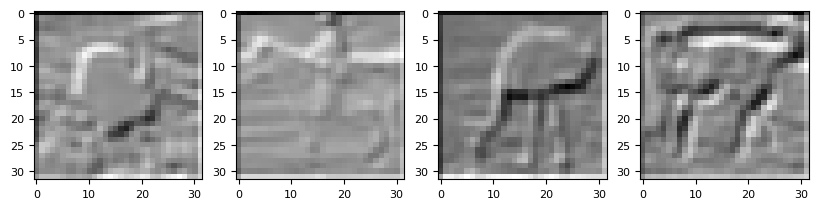

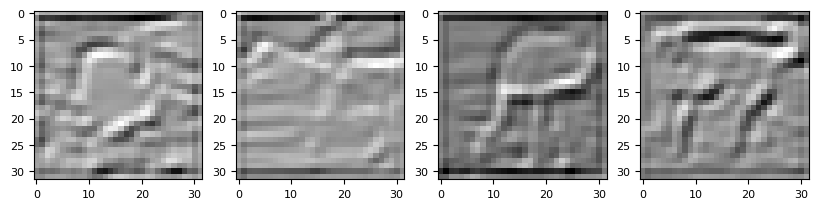

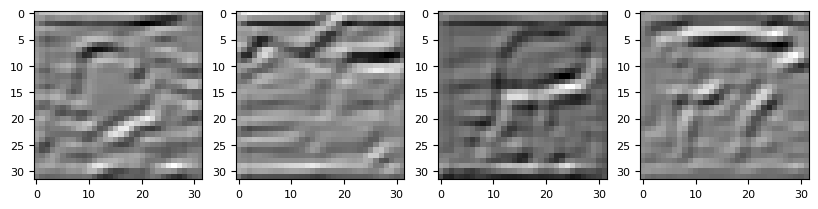

In [13]:
conv2 = conv(torch.broadcast_to(result,(4, 3, 32, 32)))
conv3 = conv(torch.broadcast_to(conv2,(4, 3, 32, 32)))

print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,:]),1,4,10)
print_iamges(list(conv2.permute(0,2,3,1).detach().numpy()[:,:,:,:]),1,4,10)
print_iamges(list(conv3.permute(0,2,3,1).detach().numpy()[:,:,:,:]),1,4,10)


# CNN model

In [14]:
ts = transforms.Compose([
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

x = torch.randn(64, 3, 30, 30)
out = ts(x)
print(out.shape)
# > torch.Size([64, 3, 24, 24])

torch.Size([64, 3, 30, 30])


In [15]:
import numpy as np
train_x = train_data.data

ts = v2.Compose([transforms.ToTensor()])
ts(train_x[0]).shape


torch.Size([3, 32, 32])

In [16]:
from torch.utils import data
import torch
import numpy as np

class CIFAR10Dataset(data.Dataset):
  def __init__(self, dataset, mean, std):

    self.train_x = torch.tensor(dataset.data).permute(0,3,1,2).float()
    self.train_y = dataset.targets
    self.len = len(dataset)

    self.ts = transforms.Compose([
        transforms.Normalize(mean, std),
    ])
  def __len__(self):
    return self.len


  def __getitem__(self, idx):
    if isinstance(idx, slice):
      raise 0
    return self.ts(self.train_x[idx]),self.train_y[idx]


mean = train_data.data.mean()
std = train_data.data.std()
train_dataset = CIFAR10Dataset(train_data,mean,std)
test_dataset = CIFAR10Dataset(test_data,mean,std)

for x, y in train_dataset:
  break

from torch.utils.data import DataLoader

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")




class CIFAR10Classifier(torch.nn.Module):
  def __init__(self):
    super().__init__()
    batch_conve = lambda in_ch, out_ch, ker, pad, act : nn.Sequential(
            nn.Conv2d(in_channels=in_ch, out_channels=out_ch,kernel_size=ker,stride = 1, padding=pad,bias=True),
            nn.BatchNorm2d(out_ch),
            act,
    )
    batch_dense_dropout = lambda in_fe, out_fe, act, dr: nn.Sequential(
            nn.Linear(in_features=in_fe, out_features=out_fe, bias=True),
            nn.BatchNorm1d(out_fe),
            act,
            nn.Dropout(p=dr),
    )
    dr = 0.1
    self.activation = nn.ReLU()
    self.layers = nn.Sequential(
            batch_conve(3,32,3,1,self.activation),
            batch_conve(32,32,3,1,self.activation),
            batch_conve(32,64,3,0,self.activation),
            batch_conve(64,64,3,1,self.activation),
            batch_conve(64,128,3,0,self.activation),
            batch_conve(128,256,3,0,self.activation),
            nn.Flatten(start_dim=1),
            batch_dense_dropout(256*26*26,1024,self.activation,dr),
            batch_dense_dropout(1024,512,self.activation,dr),
            batch_dense_dropout(512,256,self.activation,dr),
            nn.Linear(in_features=256, out_features=10, bias=True),
            nn.Softmax(dim=1),
    )
    init = lambda x : nn.init.kaiming_uniform_(x.weight,
                                                a=0, mode="fan_in",
                                                nonlinearity="relu") if type(x) == nn.Linear else x
    self.layers.apply(init)

  def forward(self, input):
    output = self.layers(input)
    return output




model = CIFAR10Classifier().to(device)
print(model)
loss_fn = nn.CrossEntropyLoss() # doesnt need one hot encoding
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    train_loss ,correct = 0,0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()


        # Backpropagation
        loss.backward() #computes dloss/dx for every parameter x which has requires_grad=True
        optimizer.step() # x.grad += dloss/dx. optimizer.step updates the value of x using the gradient x.grad .
        optimizer.zero_grad() #x.grad = 0 (useful in RNN)

        if batch % 10 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)

            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    train_loss /= len(dataloader)
    correct /= size
    print(f"Train Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {train_loss:>8f} \n")


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad(): # dont need grad
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")




epochs = 40
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(DataLoader(train_dataset,batch_size=1024,shuffle=True,num_workers=2), model, loss_fn, optimizer)
    test(DataLoader(test_dataset,batch_size=128,shuffle=False,num_workers=2), model, loss_fn)
print("Done!")


The best accuracy that I have achieved using `the` previous model was 78.8 which was based on classic nets in the next cell I'm going to implement resnet.

#Vanishing and exploding
## ReLU: Kaiming
## TanH : Xiavi


In [17]:
    # init = lambda x : nn.init.kaiming_uniform_(x.weight,
    #                                             a=0, mode="fan_in",
    #                                             nonlinearity="relu") if type(x) == nn.Linear else x
    # self.layers.apply(init)

from torch.utils.data import DataLoader

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")




class CIFAR10Classifier(torch.nn.Module):
  def __init__(self):
    super().__init__()
    batch_conve = lambda in_ch, out_ch, ker, pad, act : nn.Sequential(
            nn.Conv2d(in_channels=in_ch, out_channels=out_ch,kernel_size=ker,stride = 1, padding=pad,bias=True),
            nn.BatchNorm2d(out_ch),
            act,
    )
    batch_dense_dropout = lambda in_fe, out_fe, act, dr: nn.Sequential(
            nn.Linear(in_features=in_fe, out_features=out_fe, bias=True),
            nn.BatchNorm1d(out_fe),
            act,
            nn.Dropout(p=dr),
    )
    dr = 0.1
    self.activation = nn.ReLU()
    self.layers = nn.Sequential(
            batch_conve(3,32,3,1,self.activation),
            batch_conve(32,32,3,1,self.activation),
            batch_conve(32,64,3,0,self.activation),
            batch_conve(64,64,3,1,self.activation),
            batch_conve(64,128,3,0,self.activation),
            batch_conve(128,256,3,0,self.activation),
            nn.Flatten(start_dim=1),
            batch_dense_dropout(256*26*26,1024,self.activation,dr),
            batch_dense_dropout(1024,512,self.activation,dr),
            batch_dense_dropout(512,256,self.activation,dr),
            nn.Linear(in_features=256, out_features=10, bias=True),
            nn.Softmax(dim=1),
    )
    init = lambda x : nn.init.kaiming_uniform_(x.weight,
                                                a=0, mode="fan_in",
                                                nonlinearity="relu") if type(x) == nn.Linear else x
    self.layers.apply(init)

  def forward(self, input):
    output = self.layers(input)
    return output




model = CIFAR10Classifier().to(device)
print(model)
loss_fn = nn.CrossEntropyLoss() # doesnt need one hot encoding
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)



# resnetX = (Num of channels, repetition, Bottleneck_expansion , Bottleneck_layer)
model_parameters={}
model_parameters['resnet18'] = ([64,128,256,512],[2,2,2,2],1,False)
model_parameters['resnet34'] = ([64,128,256,512],[3,4,6,3],1,False)
model_parameters['resnet50'] = ([64,128,256,512],[3,4,6,3],4,True)
model_parameters['resnet101'] = ([64,128,256,512],[3,4,23,3],4,True)
model_parameters['resnet152'] = ([64,128,256,512],[3,8,36,3],4,True)


class Bottleneck(nn.Module):

    def __init__(self,in_channels,intermediate_channels,expansion,is_Bottleneck,stride):

        """
        Creates a Bottleneck with conv 1x1->3x3->1x1 layers.

        Note:
          1. Addition of feature maps occur at just before the final ReLU with the input feature maps
          2. if input size is different from output, select projected mapping or else identity mapping.
          3. if is_Bottleneck=False (3x3->3x3) are used else (1x1->3x3->1x1). Bottleneck is required for resnet-50/101/152
        Args:
            in_channels (int) : input channels to the Bottleneck
            intermediate_channels (int) : number of channels to 3x3 conv
            expansion (int) : factor by which the input #channels are increased
            stride (int) : stride applied in the 3x3 conv. 2 for first Bottleneck of the block and 1 for remaining

        Attributes:
            Layer consisting of conv->batchnorm->relu

        """

        super(Bottleneck,self).__init__()

        self.expansion = expansion
        self.in_channels = in_channels
        self.intermediate_channels = intermediate_channels
        self.is_Bottleneck = is_Bottleneck

        # i.e. if dim(x) == dim(F) => Identity function
        if self.in_channels==self.intermediate_channels*self.expansion:
            self.identity = True
        else:
            self.identity = False
            projection_layer = []
            projection_layer.append(nn.Conv2d(in_channels=self.in_channels, out_channels=self.intermediate_channels*self.expansion, kernel_size=1, stride=stride, padding=0, bias=False ))
            projection_layer.append(nn.BatchNorm2d(self.intermediate_channels*self.expansion))
            # Only conv->BN and no ReLU
            # projection_layer.append(nn.ReLU())
            self.projection = nn.Sequential(*projection_layer)

        # commonly used relu
        self.relu = nn.ReLU()

        # is_Bottleneck = True for all ResNet 50+
        if self.is_Bottleneck:
            # bottleneck
            # 1x1
            self.conv1_1x1 = nn.Conv2d(in_channels=self.in_channels, out_channels=self.intermediate_channels, kernel_size=1, stride=1, padding=0, bias=False )
            self.batchnorm1 = nn.BatchNorm2d(self.intermediate_channels)

            # 3x3
            self.conv2_3x3 = nn.Conv2d(in_channels=self.intermediate_channels, out_channels=self.intermediate_channels, kernel_size=3, stride=stride, padding=1, bias=False )
            self.batchnorm2 = nn.BatchNorm2d(self.intermediate_channels)

            # 1x1
            self.conv3_1x1 = nn.Conv2d(in_channels=self.intermediate_channels, out_channels=self.intermediate_channels*self.expansion, kernel_size=1, stride=1, padding=0, bias=False )
            self.batchnorm3 = nn.BatchNorm2d( self.intermediate_channels*self.expansion )

        else:
            # basicblock
            # 3x3
            self.conv1_3x3 = nn.Conv2d(in_channels=self.in_channels, out_channels=self.intermediate_channels, kernel_size=3, stride=stride, padding=1, bias=False )
            self.batchnorm1 = nn.BatchNorm2d(self.intermediate_channels)

            # 3x3
            self.conv2_3x3 = nn.Conv2d(in_channels=self.intermediate_channels, out_channels=self.intermediate_channels, kernel_size=3, stride=1, padding=1, bias=False )
            self.batchnorm2 = nn.BatchNorm2d(self.intermediate_channels)

    def forward(self,x):
        # input stored to be added before the final relu
        in_x = x

        if self.is_Bottleneck:
            # conv1x1->BN->relu
            x = self.relu(self.batchnorm1(self.conv1_1x1(x)))

            # conv3x3->BN->relu
            x = self.relu(self.batchnorm2(self.conv2_3x3(x)))

            # conv1x1->BN
            x = self.batchnorm3(self.conv3_1x1(x))

        else:
            # conv3x3->BN->relu
            x = self.relu(self.batchnorm1(self.conv1_3x3(x)))

            # conv3x3->BN
            x = self.batchnorm2(self.conv2_3x3(x))


        # identity or projected mapping
        if self.identity:
            x += in_x
        else:
            x += self.projection(in_x)

        # final relu
        x = self.relu(x)

        return x


# Bottleneck(64*4,64,4,stride=1)

def test_Bottleneck():
    x = torch.randn(1,64,32,32)
    model = Bottleneck(64,64,4,True,2)
    print(model(x).shape)
    return model

test_Bottleneck()

In [18]:
from torch.utils.data import DataLoader

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")


class Bottleneck(nn.Module):
  def __init__(self,in_channels,main_channels, out_channels, stride=1):
    super().__init__()
    self.out_channels = out_channels

    self.projection_layer = nn.Sequential(
        nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=1, stride=stride),
        nn.BatchNorm2d(out_channels),
    )
    self.conv1 = nn.Conv2d(in_channels,main_channels,kernel_size=1, bias=False)
    self.conv2 = nn.Conv2d(main_channels,main_channels,kernel_size=3, padding=1, stride=stride,bias=False)
    self.conv3= nn.Conv2d(main_channels, out_channels, kernel_size=1, bias=False)

    self.norm1 = nn.BatchNorm2d(main_channels)
    self.norm2 = nn.BatchNorm2d(main_channels)
    self.norm3 = nn.BatchNorm2d(out_channels)
    self.activation = nn.ReLU()

  def forward(self, input):
    if input.shape[1] != self.out_channels:
      skip = self.projection_layer(input)
    else :
       skip = input

    out = self.activation(self.norm1(self.conv1(input)))
    out = self.activation(self.norm2(self.conv2(out)))
    out = self.activation(self.norm3(self.conv3(out)) + skip)

    return out

def test_Bottleneck():
    x = torch.randn(1,256,32,32)
    model = Bottleneck(256,64,256)
    print(model(x).shape)
    return model

test_Bottleneck()

Using cuda device
torch.Size([1, 256, 32, 32])


Bottleneck(
  (projection_layer): Sequential(
    (0): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (norm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activation): ReLU()
)

In [19]:
# model_parameters['resnet50'] = ([64,128,256,512],[3,4,6,3],4,True)
# resnetX = (Num of channels, repetition, Bottleneck_expansion , Bottleneck_layer)
class ResNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.head = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels= 64, kernel_size=3, padding=1),
        nn.BatchNorm2d(num_features = 64),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride = 2)
    )
    layers = [64,128,256,512]
    repetition = [3,4,6,3]
    self.architecture = list(zip(layers,repetition))
    residual_layers = []
    input_channels = 64
    for layer,rep in self.architecture:
      for r in range(rep):
        out_channels = layer * 4
        # print(f"in_channels:{input_channels}, main_channels:{layer}, out_channels:{out_channels}")
        if input_channels == 1024 and out_channels == 2048:
          residual_layers.append(Bottleneck(input_channels,layer,out_channels,2))
        else:
          residual_layers.append(Bottleneck(input_channels,layer,out_channels))
        input_channels = out_channels

    self.residual_layers = nn.Sequential(*residual_layers)
    self.bottom = nn.Sequential(
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.Linear(in_features=2048 * 4 * 4,out_features=10),
        nn.Softmax(dim = 1)
    )


  def forward(self, input):
    out = self.head(input)
    out = self.residual_layers(out)
    out = self.bottom(out)
    return out


foo = ResNet()
def test_ResNet():
    x = torch.randn(1,3,32,32)
    model = ResNet()
    print(model(x).shape)
    return model

test_ResNet()

torch.Size([1, 10])


ResNet(
  (head): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (residual_layers): Sequential(
    (0): Bottleneck(
      (projection_layer): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (

In [ ]:
import time
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    train_loss ,correct = 0,0
    for batch, (X, y) in enumerate(dataloader):
        start = time.time()
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()


        # Backpropagation
        loss.backward() #computes dloss/dx for every parameter x which has requires_grad=True
        optimizer.step() # x.grad += dloss/dx. optimizer.step updates the value of x using the gradient x.grad .
        optimizer.zero_grad() #x.grad = 0 (useful in RNN)

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            stop = time.time()
            duration = stop-start
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}] Execution time :{duration*100:.0f} sec")

    train_loss /= len(dataloader)
    correct /= size
    print(f"Train Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {train_loss:>8f} \n")


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad(): # dont need grad
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")




epochs = 5
model = ResNet().to(device)
loss_fn = nn.CrossEntropyLoss() # doesnt need one hot encoding
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
batch_size = 64
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(DataLoader(train_dataset,batch_size=batch_size,shuffle=True,num_workers=2), model, loss_fn, optimizer)
    test(DataLoader(test_dataset,batch_size=int(batch_size/2),shuffle=False,num_workers=2), model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.320002  [   64/50000] Execution time :2766.088 sec
loss: 2.351776  [ 6464/50000] Execution time :531.972 sec
loss: 2.429901  [12864/50000] Execution time :537.463 sec
loss: 2.351776  [19264/50000] Execution time :531.638 sec
loss: 2.336675  [25664/50000] Execution time :541.540 sec
loss: 2.429901  [32064/50000] Execution time :536.600 sec
loss: 2.383026  [38464/50000] Execution time :552.346 sec
loss: 2.304901  [44864/50000] Execution time :552.421 sec
Train Error: 
 Accuracy: 10.0%, Avg loss: 2.360476 

Test Error: 
 Accuracy: 10.0%, Avg loss: 2.361011 

Epoch 2
-------------------------------
loss: 2.351776  [   64/50000] Execution time :341.011 sec
loss: 2.383026  [ 6464/50000] Execution time :554.962 sec
loss: 2.238021  [12864/50000] Execution time :558.584 sec
loss: 2.244815  [19264/50000] Execution time :557.611 sec
loss: 2.200952  [25664/50000] Execution time :539.046 sec
loss: 2.196332  [32064/50000] Execution time :556.435 sec
lo